## Comparação entre salário de professores da USP, UNICAMP e UNESP

Benny Chun Yin Ng

Bruna Magrini da Cruz

Higor Souza Cunha

In [1]:
# Inicialização de Bibliotecas
# Bibliotecas básicas
import numpy as np
import pandas as pd
import glob

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

## Dados da USP

In [44]:
path = "Datasets/USP"
all_files = glob.glob(path + "/*.txt")

In [45]:
all_files

['Datasets/USP\\22_06.txt',
 'Datasets/USP\\22_07.txt',
 'Datasets/USP\\22_08.txt',
 'Datasets/USP\\22_09.txt',
 'Datasets/USP\\22_10.txt']

In [46]:
li = []

for filename in all_files:
    year, month = filename[13:18].split("_")
    df = pd.read_csv(filename, sep=';', header=0, encoding='latin-1', index_col=False)
    df["Data"] = pd.to_datetime(f"{month}/{year}", format="%m/%y")
    li.append(df)

df = li[0]
for i in range(1,len(li)):
    df = df.append(li[i], ignore_index=True)

In [47]:
df = df.rename(columns={" Nome": "Nome"})

In [48]:
df['Salário Mensal'] = df['Salário Mensal'].str.replace(',', '.').astype(float)
df['Parcelas Eventuais'] = df['Parcelas Eventuais'].str.replace(',', '.').astype(float)
df['Líquido'] = df['Líquido'].str.replace(',', '.').astype(float)

In [49]:
df.dtypes

Nome                           object
Unid/Orgão                     object
Depto/Setor                    object
Jornada                        object
Categoria                      object
Classe                         object
Ref/MS                         object
Função                         object
Função de Estrutura            object
Tempo USP                       int64
Parcelas Eventuais            float64
Salário Mensal                float64
Líquido                       float64
Data                   datetime64[ns]
dtype: object

In [50]:
df['Função'].value_counts().filter(like="Professor")

Professor Doutor                           15551
Professor Associado                        15403
Professor Titular                          10886
Professor Contratado                        1595
Professor de Educação Infantil - PROFEI      460
Professor de Ensino Fundamental e Médio      183
Professor Colaborador III                    108
Professor Colaborador                         86
Professor                                     75
Professor Catedratico                         30
Professor Dr. Química                         25
Professor de Química                          20
Professor Cálculo Numérico                     5
Professor Educ. Artística                      5
Professor de Português                         5
Professor de História                          5
Professor Geografia                            5
Name: Função, dtype: int64

In [51]:
df = df[df["Função"].isin(['Professor Doutor', 'Professor Associado', 'Professor Titular', 'Professor Contratado', 'Professor Catedratico', 'Professor Dr. Química', 'Professor Cálculo Numérico'])]
df = df.reset_index(drop=True)

In [52]:
df

,Nome,Unid/Orgão,Depto/Setor,Jornada,Categoria,Classe,Ref/MS,Função,Função de Estrutura,Tempo USP,Parcelas Eventuais,Salário Mensal,Líquido,Data
0,Francisco Carlos Biaggio,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,3253.52,3120.30,2022-06-01
1,Isabel Cristina Coelho Calegao,EEL,Escola de Engenharia de Lorena,24 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,1952.11,1823.40,2022-06-01
2,Darcy Nunes Villela Filho,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Cálculo Numérico,NaN,15,0.0,3253.52,3120.30,2022-06-01
3,Gilberto Garcia Cortez,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,3253.52,3120.30,2022-06-01
4,Marcelo Rodrigues de Holanda,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,3253.52,3120.30,2022-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43490,Norma Maria Baptista Gomes,MZ,Inativo,Completa,Func Apos,Biolog,C,Professor Doutor,NaN,0,0.0,16232.76,11050.30,2022-10-01
43491,Nelson Papavero,MZ,Inativo,Completa,Func Apos,Biolog,C,Professor Doutor,NaN,0,0.0,19100.86,12763.07,2022-10-01
43492,Maria Antonieta de Toledo Ribeiro Bastos,MP,Inativo,Completa,Func Apos,Geografo,A,Professor Doutor,NaN,0,0.0,16232.76,13505.19,2022-10-01
43493,Antonio Enedi Boaretto,CENA,Inativo,Completa,Func Apos,Eng Agri,A,Professor Associado,NaN,0,0.0,23048.59,19717.47,2022-10-01


In [53]:
df.to_csv('Datasets/Consolidado/prof_USP.csv', index = False, encoding='latin-1')

## Dados da UNESP

In [83]:
path = "Datasets/UNESP"
all_files = glob.glob(path + "/*.csv")

In [84]:
all_files

['Datasets/UNESP\\2022-06.csv',
 'Datasets/UNESP\\2022-07.csv',
 'Datasets/UNESP\\2022-08.csv',
 'Datasets/UNESP\\2022-09.csv',
 'Datasets/UNESP\\2022-10.csv']

In [85]:
li = []

for filename in all_files:
    year, month = filename[17:22].split("-")
    df = pd.read_csv(filename, sep=',', header=0,
                            names=['ano', 'mes', 'matricula', 'nome', 'jornada', 'funcao', 
                                   'vencimentos', 'remuneracao', 'descontos', 'redutor_constitucional', 'salario_liquido', 
                                   'adicionais_por_tempo_de_servico', 'situacao'])
    li.append(df)

df = li[0]
for i in range(1,len(li)):
    df = df.append(li[i], ignore_index=True)

In [86]:
df

,ano,mes,matricula,nome,jornada,funcao,vencimentos,remuneracao,descontos,redutor_constitucional,salario_liquido,adicionais_por_tempo_de_servico,situacao
0,2022,6,0310002-9,BARTIRA MOTTA,40,ASSIST ADMINIST II,"R$ 6.411,80","R$ 6.411,80","R$ 1.160,85","R$ 0,00","R$ 5.250,95",6,Aposentado em : 25/11/1981
1,2022,6,0310004-2,ELZA APPARECIDA DE S VALLE,40,OFICIAL DE ADM UNIV,"R$ 7.069,02","R$ 7.069,02","R$ 2.485,05","R$ 0,00","R$ 4.583,97",6,Aposentado em : 18/02/1982
2,2022,6,0310005-4,EUGENIA FERRO,40,OFICIAL DE ADM UNIV,"R$ 11.882,43","R$ 11.882,43","R$ 3.350,95","R$ 0,00","R$ 8.531,48",6,Aposentado em : 31/03/1998
3,2022,6,0310008-0,JANDYRA MENDES,40,BIBLIOTECARIO,"R$ 11.778,21","R$ 11.778,21","R$ 3.307,07","R$ 0,00","R$ 8.471,14",5,Aposentado em : 30/04/1985
4,2022,6,0310010-8,JOAO PEDRO PAGOTTO,40,TEC SUP ADM UNIV,"R$ 26.938,23","R$ 26.938,23","R$ 13.337,53","R$ 3.889,64","R$ 13.600,70",5,Aposentado em : 03/02/1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78448,2022,10,0700029-7,HILDO GUILLARDI JUNIOR,40,PROF ASSIST DR MS3.1,"R$ 13.357,25","R$ 13.357,25","R$ 3.805,00","R$ 0,00","R$ 9.552,25",0,Ativo
78449,2022,10,0700036-4,VINICIUS TAVARES AZEVEDO,24,PROF SUBSTITUTO-DET,"R$ 4.201,95","R$ 4.201,95","R$ 638,24","R$ 0,00","R$ 3.563,71",0,Ativo
78450,2022,10,0700043-1,LUCIEL HENRIQUE DE OLIVEIRA,12,PROF SUBSTITUTO-DET,"R$ 2.315,33","R$ 2.315,33","R$ 30,84","R$ 0,00","R$ 2.284,49",0,Ativo
78451,2022,10,0700050-9,MARCOS TREVISAN VASCONCELLOS,12,PROF SUBSTITUTO-DET,"R$ 2.315,33","R$ 2.315,33","R$ 206,77","R$ 0,00","R$ 2.108,56",0,Ativo


In [87]:
df.dtypes

ano                                 int64
mes                                 int64
matricula                          object
nome                               object
jornada                             int64
funcao                             object
vencimentos                        object
remuneracao                        object
descontos                          object
redutor_constitucional             object
salario_liquido                    object
adicionais_por_tempo_de_servico     int64
situacao                           object
dtype: object

In [88]:
df['vencimentos'] = df['vencimentos'].str.replace('R\$ ', '')
df['descontos'] = df['descontos'].str.replace('R\$ ', '')
df['remuneracao'] = df['remuneracao'].str.replace('R\$ ', '')
df['redutor_constitucional'] = df['redutor_constitucional'].str.replace('R\$ ', '')
df['salario_liquido'] = df['salario_liquido'].str.replace('R\$ ', '')

C:\Users\benny\AppData\Local\Temp/ipykernel_21224/1630591128.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vencimentos'] = df['vencimentos'].str.replace('R\$ ', '')
C:\Users\benny\AppData\Local\Temp/ipykernel_21224/1630591128.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['descontos'] = df['descontos'].str.replace('R\$ ', '')
C:\Users\benny\AppData\Local\Temp/ipykernel_21224/1630591128.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['remuneracao'] = df['remuneracao'].str.replace('R\$ ', '')
C:\Users\benny\AppData\Local\Temp/ipykernel_21224/1630591128.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['redutor_constitucional'] = df['redutor_constitucional'].str.replace('R\$ ', '')
C:\Users\benny\AppData\Local\Temp/ipykernel_21224/1630591128.py:5: FutureWarning: 

In [89]:
df['vencimentos'] = df['vencimentos'].str.replace('.', '')
df['descontos'] = df['descontos'].str.replace('.', '')
df['remuneracao'] = df['remuneracao'].str.replace('.', '')
df['redutor_constitucional'] = df['redutor_constitucional'].str.replace('.', '')
df['salario_liquido'] = df['salario_liquido'].str.replace('.', '')

C:\Users\benny\AppData\Local\Temp/ipykernel_21224/370987754.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['vencimentos'] = df['vencimentos'].str.replace('.', '')
C:\Users\benny\AppData\Local\Temp/ipykernel_21224/370987754.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['descontos'] = df['descontos'].str.replace('.', '')
C:\Users\benny\AppData\Local\Temp/ipykernel_21224/370987754.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['remuneracao'] = df['remuneracao'].str.replace('.', '')
C:\Users\benny\Ap

In [90]:
df['vencimentos'] = df['vencimentos'].str.replace(',', '.').astype(float)
df['descontos'] = df['descontos'].str.replace(',', '.').astype(float)
df['remuneracao'] = df['remuneracao'].str.replace(',', '.').astype(float)
df['redutor_constitucional'] = df['redutor_constitucional'].str.replace(',', '.').astype(float)
df['salario_liquido'] = df['salario_liquido'].str.replace(',', '.').astype(float)

In [91]:
df

,ano,mes,matricula,nome,jornada,funcao,vencimentos,remuneracao,descontos,redutor_constitucional,salario_liquido,adicionais_por_tempo_de_servico,situacao
0,2022,6,0310002-9,BARTIRA MOTTA,40,ASSIST ADMINIST II,6411.80,6411.80,1160.85,0.00,5250.95,6,Aposentado em : 25/11/1981
1,2022,6,0310004-2,ELZA APPARECIDA DE S VALLE,40,OFICIAL DE ADM UNIV,7069.02,7069.02,2485.05,0.00,4583.97,6,Aposentado em : 18/02/1982
2,2022,6,0310005-4,EUGENIA FERRO,40,OFICIAL DE ADM UNIV,11882.43,11882.43,3350.95,0.00,8531.48,6,Aposentado em : 31/03/1998
3,2022,6,0310008-0,JANDYRA MENDES,40,BIBLIOTECARIO,11778.21,11778.21,3307.07,0.00,8471.14,5,Aposentado em : 30/04/1985
4,2022,6,0310010-8,JOAO PEDRO PAGOTTO,40,TEC SUP ADM UNIV,26938.23,26938.23,13337.53,3889.64,13600.70,5,Aposentado em : 03/02/1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78448,2022,10,0700029-7,HILDO GUILLARDI JUNIOR,40,PROF ASSIST DR MS3.1,13357.25,13357.25,3805.00,0.00,9552.25,0,Ativo
78449,2022,10,0700036-4,VINICIUS TAVARES AZEVEDO,24,PROF SUBSTITUTO-DET,4201.95,4201.95,638.24,0.00,3563.71,0,Ativo
78450,2022,10,0700043-1,LUCIEL HENRIQUE DE OLIVEIRA,12,PROF SUBSTITUTO-DET,2315.33,2315.33,30.84,0.00,2284.49,0,Ativo
78451,2022,10,0700050-9,MARCOS TREVISAN VASCONCELLOS,12,PROF SUBSTITUTO-DET,2315.33,2315.33,206.77,0.00,2108.56,0,Ativo


In [92]:
df.dtypes

ano                                  int64
mes                                  int64
matricula                           object
nome                                object
jornada                              int64
funcao                              object
vencimentos                        float64
remuneracao                        float64
descontos                          float64
redutor_constitucional             float64
salario_liquido                    float64
adicionais_por_tempo_de_servico      int64
situacao                            object
dtype: object

In [96]:
df['funcao'].value_counts().filter(like="PROF")

PROF ASSIST DR MS3.1    8085
PROF ASSIST DR MS3.2    4711
PROF TITULAR            3783
PROF ASSOCIADO III      3510
PROF ASSOCIADO I        3444
PROF SUBSTITUTO-DET     2079
PROF ASSOCIADO II        558
PROF ASSISTENTE          499
PROF ASSIST A MS3.1       51
PROF COLABORADOR          28
PROF ASSISTENTE C         25
PROF LIVRE DOCENTE        16
PROF TITULAR MS 5-3       15
PROF ASSISTENTE A         10
PROF EDUCACAO BAS II       5
PROF ASSIST B MS3.1        5
PROFESSOR TITULAR          5
PROF ASSISTENTE B          5
Name: funcao, dtype: int64

In [97]:
df = df[df["funcao"].isin(['PROF ASSIST DR MS3.1', 'PROF ASSIST DR MS3.2', 'PROF TITULAR', 'PROF ASSOCIADO III', 'PROF ASSOCIADO I', 'PROF SUBSTITUTO-DET', 'PROF ASSOCIADO II',
                          'PROF ASSISTENTE', 'PROF ASSIST A MS3.1', 'PROF ASSISTENTE C', 'PROF LIVRE DOCENTE', 'PROF TITULAR MS 5-3', 'PROF ASSISTENTE A', 'PROF ASSIST B MS3.1',
                          'PROFESSOR TITULAR', 'PROF ASSISTENTE B'])]
df = df.reset_index(drop=True)

In [98]:
df

,ano,mes,matricula,nome,jornada,funcao,vencimentos,remuneracao,descontos,redutor_constitucional,salario_liquido,adicionais_por_tempo_de_servico,situacao
0,2022,6,0311560-4,ALFREDO PIO N R GALEAO,40,PROF ASSIST DR MS3.2,23059.83,23059.83,8004.49,0.0,15055.34,7,Aposentado em : 15/10/2012
1,2022,6,0311584-7,ADRIANO ANTONIO NATALE,40,PROF TITULAR,35705.15,35705.15,12257.02,0.0,23448.13,5,Aposentado em : 15/03/2013
2,2022,6,0311585-9,GERSON FRANCISCO,40,PROF ASSOCIADO I,30619.87,30619.87,11187.27,0.0,19432.60,5,Aposentado em : 01/12/2012
3,2022,6,0311586-0,MARIA CRISTINA B A RIBEIRO,40,PROF ASSOCIADO III,25963.09,25963.09,8500.01,0.0,17463.08,4,Aposentado em : 15/10/2012
4,2022,6,0311593-8,ABRAHAM HIRSZ ZIMERMAN,40,PROF TITULAR,20848.64,20848.64,6500.26,0.0,14348.38,1,Aposentado em : 08/03/1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26796,2022,10,0700029-7,HILDO GUILLARDI JUNIOR,40,PROF ASSIST DR MS3.1,13357.25,13357.25,3805.00,0.0,9552.25,0,Ativo
26797,2022,10,0700036-4,VINICIUS TAVARES AZEVEDO,24,PROF SUBSTITUTO-DET,4201.95,4201.95,638.24,0.0,3563.71,0,Ativo
26798,2022,10,0700043-1,LUCIEL HENRIQUE DE OLIVEIRA,12,PROF SUBSTITUTO-DET,2315.33,2315.33,30.84,0.0,2284.49,0,Ativo
26799,2022,10,0700050-9,MARCOS TREVISAN VASCONCELLOS,12,PROF SUBSTITUTO-DET,2315.33,2315.33,206.77,0.0,2108.56,0,Ativo


In [99]:
df.to_csv('Datasets/Consolidado/prof_UNESP.csv', index = False)

## Dados UNICAMP

In [156]:
df = pd.read_csv('Datasets/UNICAMP/df_unicamp_06to10_2022.csv', header=0, index_col=0)

In [157]:
df

,Nome,Matrícula,Lotação,Cargo,Referência,Salário Bruto Nominal,Redutor,Salário Bruto Efetivo,Férias e 13o Salário,Indenizações,Descontos,Líquido,Ano,Mês
0,ABEL BENATI,285145,01.14.27.02 REITORIA/PREFEITURA GABINETE/DIVIS...,ENGENHEIRO / Engenheiro eletricista,S1C,17559.98,0.00,17559.98,4287.21,0.0,4190.89,13369.09,2022,6
1,ABEL MAIA GENOVEZ,35572,"05.15 FACULDADE DE ENGENHARIA CIVIL, ARQUITETU...",Professor Titular,MS6,34849.65,0.00,34849.65,0.00,0.0,11974.68,22874.97,2022,6
2,ABIGAIL CANDIDO BERTOLINI,79162,03 FACULDADE DE ENGENHARIA MECANICA,PR ASS ADMINISTRATIVOS / Administrativo auxiliar,F1A,2402.79,0.00,2402.79,0.00,0.0,214.97,2187.82,2022,6
3,ABIGAIL COSTA COELHO MOTA,318478,15.16.11.03 HOSPITAL DE CLINICAS/DEPARTAMENTO ...,TECNICO ENFERMAGEM / Técnico de enfermagem,M1A,5028.65,0.00,5028.65,0.00,0.0,914.86,4113.79,2022,6
4,ABIGAIL MARIA BICUDO,99635,15.10.09.09 HOSPITAL DE CLINICAS/COORDENADORIA...,FARMACEUTICO / Farmacêutico,S1D,17074.74,0.00,17074.74,0.00,0.0,5024.69,12050.05,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13884,ZUHAIR WARWAR,1155,"05 FACULDADE DE ENGENHARIA CIVIL, ARQUITETURA ...",Técnico Administrativo,46,25071.81,2023.22,23048.59,0.00,0.0,3331.11,19717.48,2022,10
13885,ZULMA SOUSA NOVAES,290899,15.09.01 HOSPITAL DE CLINICAS/COORDENADORIA DE...,ENGENHEIRO / Engenheiro eletrônico,S1A,12584.07,0.00,12584.07,0.00,0.0,2988.54,9595.53,2022,10
13886,ZULMIRA HONORIO RIBEIRO DE ARAUJO,161896,27.10.11.02 HOSPITAL DA MULHER PROF.DR.JOSE AR...,TECNICO ENFERMAGEM / Técnico de enfermagem,-,2211.28,0.00,2211.28,0.00,0.0,186.25,2025.03,2022,10
13887,ZULMIRA ROQUE NUNES DE OLIVEIRA,150932,01.12.16.03 REITORIA/DIRETORIA GERAL DE ADMINI...,PR ASS ADMINISTRATIVOS / Técnico em administração,M1A,5871.78,0.00,5871.78,0.00,0.0,932.58,4939.20,2022,10


In [158]:
df.dtypes

Nome                      object
Matrícula                  int64
Lotação                   object
Cargo                     object
Referência                object
Salário Bruto Nominal    float64
Redutor                  float64
Salário Bruto Efetivo    float64
Férias e 13o Salário     float64
Indenizações             float64
Descontos                float64
Líquido                  float64
Ano                        int64
Mês                        int64
dtype: object

In [159]:
df['Cargo'].value_counts().filter(like="Professor")

Professor Associado I                          4089
Professor Titular                              4001
Professor Doutor I                             2498
Professor Doutor II                            2259
Professor Magistério Secundário Técnico III    1349
Professor Associado II                         1090
Professor Associado III                         842
Professor Assistente                            293
Professor Magistério Secundário Técnico II      222
Professor Pleno MTS-C                            90
Professor Associado MTS-B                        86
Professor Doutor                                 75
Professor                                        65
Professor Associado - MA II                      60
Professor Associado                              60
Professor Pleno - MA III                         49
Professor Assistente - MA I                      35
Professor Magistério Secundário Técnico I         5
Professor Assistente MTS-A                        5
Name: Cargo,

In [161]:
prof_li = []
for i in range (len(df['Cargo'].value_counts().filter(like="Professor").index)):
    prof_li.append(df['Cargo'].value_counts().filter(like="Professor").index[i])

prof_li

['Professor Associado I',
 'Professor Titular',
 'Professor Doutor I',
 'Professor Doutor II',
 'Professor Magistério Secundário Técnico III',
 'Professor Associado II',
 'Professor Associado III',
 'Professor Assistente',
 'Professor Magistério Secundário Técnico II',
 'Professor Pleno MTS-C',
 'Professor Associado MTS-B',
 'Professor Doutor',
 'Professor',
 'Professor Associado - MA II',
 'Professor Associado',
 'Professor Pleno - MA III',
 'Professor Assistente - MA I',
 'Professor Magistério Secundário Técnico I',
 'Professor Assistente MTS-A']

In [162]:
df = df[df["Cargo"].isin(prof_li)]
df = df.reset_index(drop=True)
df

,Nome,Matrícula,Lotação,Cargo,Referência,Salário Bruto Nominal,Redutor,Salário Bruto Efetivo,Férias e 13o Salário,Indenizações,Descontos,Líquido,Ano,Mês
0,ABEL MAIA GENOVEZ,35572,"05.15 FACULDADE DE ENGENHARIA CIVIL, ARQUITETU...",Professor Titular,MS6,34849.65,0.0,34849.65,0.0,0.00,11974.68,22874.97,2022,6
1,ABIMAEL ARANHA NETTO,74217,02.02 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Doutor II,MS3.2,14712.20,0.0,14712.20,0.0,0.00,4225.96,10486.24,2022,6
2,ABIMAEL MARTINS COSTA,48950,02.05 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Assistente,MS2 I,16281.11,0.0,16281.11,0.0,0.00,4714.38,11566.73,2022,6
3,ABNER DE SIERVO,291516,"08.03 INSTITUTO DE FISICA ""GLEB WATAGHIN""/DEPA...",Professor Associado II,MS5.2,19631.84,0.0,19631.84,0.0,0.00,6540.49,13091.35,2022,6
4,ACI TAVEIRA MEYER,69388,17.02 INSTITUTO DE ARTES/DEPARTAMENTO DE MUSICA,Professor Doutor I,MS3.1,7680.55,0.0,7680.55,0.0,0.00,996.94,6683.61,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17168,ZELIA ZILDA LOURENCO DE C BITTENCOURT,295179,02.44 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Associado I,MS5.1,24632.10,0.0,24632.10,0.0,2709.53,8614.00,18727.63,2022,10
17169,ZELJKO LOPARIC,47066,09.03 INSTITUTO DE FILOSOFIA E CIENCIAS HUMANA...,Professor Titular,MS6,34690.09,0.0,34690.09,0.0,0.00,11912.29,22777.80,2022,10
17170,ZIGOMAR MENEZES DE SOUZA,290412,28 FACULDADE DE ENGENHARIA AGRICOLA,Professor Titular,MS6,27644.55,0.0,27644.55,0.0,0.00,8684.73,18959.82,2022,10
17171,ZORAIDA SACHETTO,303420,02.09 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Doutor II,MS3.2,16497.93,0.0,16497.93,0.0,0.00,4657.73,11840.20,2022,10


In [163]:
df.to_csv('Datasets/Consolidado/prof_UNICAMP.csv', index = False)

## Análise salarial USP x UNESP x UNICAMP

In [185]:
df_USP = pd.read_csv('Datasets/Consolidado/prof_USP.csv', header=0, encoding='latin-1', index_col=False)

In [186]:
df_USP

,Nome,Unid/Orgão,Depto/Setor,Jornada,Categoria,Classe,Ref/MS,Função,Função de Estrutura,Tempo USP,Parcelas Eventuais,Salário Mensal,Líquido,Data
0,Francisco Carlos Biaggio,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,3253.52,3120.30,2022-06-01
1,Isabel Cristina Coelho Calegao,EEL,Escola de Engenharia de Lorena,24 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,1952.11,1823.40,2022-06-01
2,Darcy Nunes Villela Filho,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Cálculo Numérico,NaN,15,0.0,3253.52,3120.30,2022-06-01
3,Gilberto Garcia Cortez,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,3253.52,3120.30,2022-06-01
4,Marcelo Rodrigues de Holanda,EEL,Escola de Engenharia de Lorena,40 Horas,Celetista,Docente,NaN,Professor Dr. Química,NaN,15,0.0,3253.52,3120.30,2022-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43490,Norma Maria Baptista Gomes,MZ,Inativo,Completa,Func Apos,Biolog,C,Professor Doutor,NaN,0,0.0,16232.76,11050.30,2022-10-01
43491,Nelson Papavero,MZ,Inativo,Completa,Func Apos,Biolog,C,Professor Doutor,NaN,0,0.0,19100.86,12763.07,2022-10-01
43492,Maria Antonieta de Toledo Ribeiro Bastos,MP,Inativo,Completa,Func Apos,Geografo,A,Professor Doutor,NaN,0,0.0,16232.76,13505.19,2022-10-01
43493,Antonio Enedi Boaretto,CENA,Inativo,Completa,Func Apos,Eng Agri,A,Professor Associado,NaN,0,0.0,23048.59,19717.47,2022-10-01


In [188]:
df_UNESP = pd.read_csv('Datasets/Consolidado/prof_UNESP.csv', header=0, index_col=False)

In [189]:
df_UNESP

,ano,mes,matricula,nome,jornada,funcao,vencimentos,remuneracao,descontos,redutor_constitucional,salario_liquido,adicionais_por_tempo_de_servico,situacao
0,2022,6,0311560-4,ALFREDO PIO N R GALEAO,40,PROF ASSIST DR MS3.2,23059.83,23059.83,8004.49,0.0,15055.34,7,Aposentado em : 15/10/2012
1,2022,6,0311584-7,ADRIANO ANTONIO NATALE,40,PROF TITULAR,35705.15,35705.15,12257.02,0.0,23448.13,5,Aposentado em : 15/03/2013
2,2022,6,0311585-9,GERSON FRANCISCO,40,PROF ASSOCIADO I,30619.87,30619.87,11187.27,0.0,19432.60,5,Aposentado em : 01/12/2012
3,2022,6,0311586-0,MARIA CRISTINA B A RIBEIRO,40,PROF ASSOCIADO III,25963.09,25963.09,8500.01,0.0,17463.08,4,Aposentado em : 15/10/2012
4,2022,6,0311593-8,ABRAHAM HIRSZ ZIMERMAN,40,PROF TITULAR,20848.64,20848.64,6500.26,0.0,14348.38,1,Aposentado em : 08/03/1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26796,2022,10,0700029-7,HILDO GUILLARDI JUNIOR,40,PROF ASSIST DR MS3.1,13357.25,13357.25,3805.00,0.0,9552.25,0,Ativo
26797,2022,10,0700036-4,VINICIUS TAVARES AZEVEDO,24,PROF SUBSTITUTO-DET,4201.95,4201.95,638.24,0.0,3563.71,0,Ativo
26798,2022,10,0700043-1,LUCIEL HENRIQUE DE OLIVEIRA,12,PROF SUBSTITUTO-DET,2315.33,2315.33,30.84,0.0,2284.49,0,Ativo
26799,2022,10,0700050-9,MARCOS TREVISAN VASCONCELLOS,12,PROF SUBSTITUTO-DET,2315.33,2315.33,206.77,0.0,2108.56,0,Ativo


In [190]:
df_UNICAMP = pd.read_csv('Datasets/Consolidado/prof_UNICAMP.csv', header=0, index_col=False)

In [191]:
df_UNICAMP

,Nome,Matrícula,Lotação,Cargo,Referência,Salário Bruto Nominal,Redutor,Salário Bruto Efetivo,Férias e 13o Salário,Indenizações,Descontos,Líquido,Ano,Mês
0,ABEL MAIA GENOVEZ,35572,"05.15 FACULDADE DE ENGENHARIA CIVIL, ARQUITETU...",Professor Titular,MS6,34849.65,0.0,34849.65,0.0,0.00,11974.68,22874.97,2022,6
1,ABIMAEL ARANHA NETTO,74217,02.02 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Doutor II,MS3.2,14712.20,0.0,14712.20,0.0,0.00,4225.96,10486.24,2022,6
2,ABIMAEL MARTINS COSTA,48950,02.05 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Assistente,MS2 I,16281.11,0.0,16281.11,0.0,0.00,4714.38,11566.73,2022,6
3,ABNER DE SIERVO,291516,"08.03 INSTITUTO DE FISICA ""GLEB WATAGHIN""/DEPA...",Professor Associado II,MS5.2,19631.84,0.0,19631.84,0.0,0.00,6540.49,13091.35,2022,6
4,ACI TAVEIRA MEYER,69388,17.02 INSTITUTO DE ARTES/DEPARTAMENTO DE MUSICA,Professor Doutor I,MS3.1,7680.55,0.0,7680.55,0.0,0.00,996.94,6683.61,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17168,ZELIA ZILDA LOURENCO DE C BITTENCOURT,295179,02.44 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Associado I,MS5.1,24632.10,0.0,24632.10,0.0,2709.53,8614.00,18727.63,2022,10
17169,ZELJKO LOPARIC,47066,09.03 INSTITUTO DE FILOSOFIA E CIENCIAS HUMANA...,Professor Titular,MS6,34690.09,0.0,34690.09,0.0,0.00,11912.29,22777.80,2022,10
17170,ZIGOMAR MENEZES DE SOUZA,290412,28 FACULDADE DE ENGENHARIA AGRICOLA,Professor Titular,MS6,27644.55,0.0,27644.55,0.0,0.00,8684.73,18959.82,2022,10
17171,ZORAIDA SACHETTO,303420,02.09 FACULDADE DE CIENCIAS MEDICAS/DEPARTAMEN...,Professor Doutor II,MS3.2,16497.93,0.0,16497.93,0.0,0.00,4657.73,11840.20,2022,10


In [192]:
df_salarios_bruto = pd.DataFrame({'USP': df_USP['Salário Mensal']+df_USP['Parcelas Eventuais'],
                             'UNESP': df_UNESP['remuneracao'],
                           'UNICAMP': df_UNICAMP['Salário Bruto Nominal']})

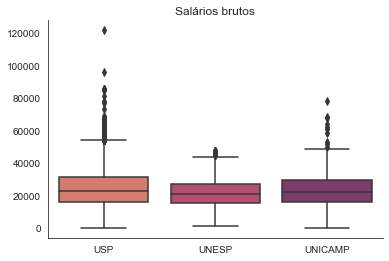

In [204]:
sns.set_style('white')
sns.boxplot(data=df_salarios_bruto, palette='flare').set(title='Salários brutos')
sns.despine()
plt.savefig('boxplot_salario_bruto.png')
plt.show()

In [194]:
df_salarios_bruto.describe()

,USP,UNESP,UNICAMP
count,43495.000000,26801.000000,17173.00000
mean,23679.588315,20762.774125,22565.51028
std,11404.444536,8891.120285,8841.58462
min,0.000000,1119.020000,36.82000
25%,16232.760000,15373.220000,16179.34000
50%,22604.520000,20736.200000,22114.65000
75%,31267.270000,26689.540000,29446.40000
max,121477.460000,47376.420000,78188.45000


In [195]:
df_salarios_liquido = pd.DataFrame({'USP': df_USP['Líquido'],
                             'UNESP': df_UNESP['salario_liquido'],
                           'UNICAMP': df_UNICAMP['Líquido']})

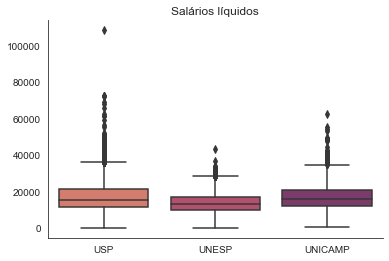

In [203]:
sns.set_style('white')
sns.boxplot(data=df_salarios_liquido, palette='flare').set(title='Salários líquidos')
sns.despine()
plt.savefig('boxplot_salario_liquido.png')
plt.show()

In [197]:
df_salarios_liquido.describe()

,USP,UNESP,UNICAMP
count,43495.000000,26801.000000,17173.000000
mean,16471.209445,13220.523822,16473.640269
std,8223.809699,6181.091592,6592.188859
min,0.000000,0.000000,501.900000
25%,11261.190000,9626.050000,11812.110000
50%,15404.200000,13039.950000,15664.510000
75%,21221.540000,17034.720000,21000.880000
max,108166.610000,42932.190000,62359.320000
